In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import cm
from collections import OrderedDict
import re

In [20]:
police=gpd.read_file('geo_export_4c54b8bd-94ef-440b-9aeb-6a5e7bebaf18.shp')

police.head(3)

,precinct,shape_len,shape_area,geometry
0,CENTRAL,46234.671731,9.854197e+07,POLYGON ((-86.77524596288148 36.14894455629901...
1,EAST,90261.133897,5.622602e+08,"POLYGON ((-86.7497744006488 36.24057415802699,..."
2,HERMITAGE,521944.947628,2.496337e+09,POLYGON ((-86.61306027277456 36.24427176621932...


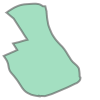

In [4]:
police.iloc[0,3]
# the first polygon

In [5]:
#str(police.iloc[0,3]) # prints the lat/lng pairs that define the polygon border 

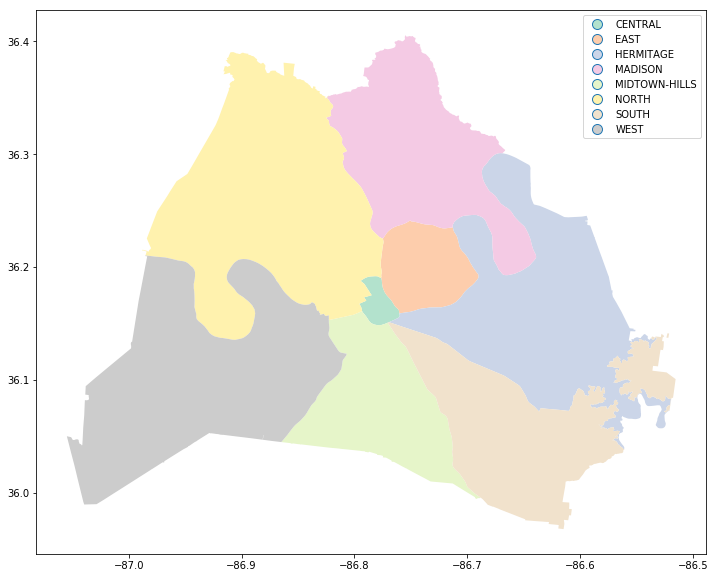

In [6]:
fig, ax=plt.subplots(figsize=(12,12), subplot_kw={'aspect':'equal'})
police.plot(column='precinct',legend=True, ax=ax, cmap='Pastel2')
plt.show()

In [7]:
violations=pd.read_csv('Property_Standards_Violations.csv')
#violations=violations.iloc[:,1:] # drop the first column
violations.head(15)

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
0,17-1156755,05/04/2017,05814005400,121 QUEENS LN,NASHVILLE,TN,37218.0,"LUSTER, PATRICIA",EMAIL,HOW TAKEN: EMAIL\r\nHigh grass,DONE,1.0,07/13/2017,Violation Inspection - PS,VIORES,HIGH WEEDS,"121 QUEENS LN\r\nNASHVILLE, TN 37218\r\n(36.21..."
1,17-1165789,08/24/2017,08116056500,1007 11TH AVE N,NASHVILLE,TN,37208.0,"SARGENT, THOMAS JR. & CHRISTINE",OTHER SOURCE,High grass/weeds.,DONE,19.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"1007 11TH AVE N\r\nNASHVILLE, TN 37208\r\n(36...."
2,17-1157131,05/09/2017,10703001600,715 ERMAC DR,NASHVILLE,TN,37214.0,"H.H. HERITAGE INN OF NASHVILLE, LLC",PHONE,High grass & weeds,DONE,15.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,HIGH WEEDS,"715 ERMAC DR\r\nNASHVILLE, TN 37214\r\n(36.146..."
3,17-1161502,07/06/2017,07116009000,903 BLUE RIDGE DR,NASHVILLE,TN,37207.0,"SIMMONS, MABLINE P.",PHONE,Inoperable vehicle on row.,DONE,5.0,08/24/2017,Initial Violation Inspection - PS,PSNVF,NaN,"903 BLUE RIDGE DR\r\nNASHVILLE, TN 37207\r\n(3..."
4,17-1153921,03/06/2017,11813018100,3605B MAYFLOWER PL,NASHVILLE,TN,37204.0,"ROBISON, ALEXANDER B. ET UX",PHONE,"Junk, trash & debris",DONE,25.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","3605B MAYFLOWER PL\r\nNASHVILLE, TN 37204\r\n(..."
5,17-1156955,05/08/2017,12001009000,1202 VULTEE BLVD,NASHVILLE,TN,37217.0,"BARRETT, MALCOLM L. JR.",PHONE,Couch in the front ditch,DONE,13.0,07/13/2017,Env Court 1st Setting - PS,DMJUSTCT,"OPEN STORAGE, JUNK, TRASH, DEBRIS","1202 VULTEE BLVD\r\nNASHVILLE, TN 37217\r\n(36..."
6,17-1165799,08/24/2017,10409011200,3723 RICHLAND AVE,NASHVILLE,TN,37205.0,"DUNDON, THOMAS H. & LEAH A.",Codes Online,advertising more guest than allowed on permit,OPEN,24.0,NaN,NaN,NaN,NaN,"3723 RICHLAND AVE\r\nNASHVILLE, TN 37205\r\n(3..."
7,17-1154514,03/20/2017,11613007600,5971 POST RD,NASHVILLE,TN,37205.0,"ELLIS, STEPHEN NICHOLAS & ODOM, KIMBERLY SUZANNE",PHONE,mattresses and trash on side of road.,DONE,23.0,04/06/2017,Violation Inspection - PS,VIORES,"OPEN STORAGE, JUNK, TRASH, DEBRIS","5971 POST RD\r\nNASHVILLE, TN 37205\r\n(36.107..."
8,15-1114246,02/11/2015,08102009600,1713 NUBELL ST,NASHVILLE,TN,37208.0,FREEDOM PROPERTIES,INSPECTOR REPORTED,VACANT/UNSECURED,DONE,2.0,12/08/2016,Final Sign-off - PS,VIORES,"EXTERIOR REPAIR,INTERIOR REPAIR","1713 NUBELL ST\r\nNASHVILLE, TN 37208\r\n(36.1..."
9,17-1153010,02/10/2017,07103005200,2402 DICKERSON PIKE,NASHVILLE,TN,37207.0,"ALBARATI, AZIZ M. & HAUTER, AMIN",PHONE,Garage door unsecure - vacant building; food t...,DONE,5.0,07/13/2017,Env Court 1st Setting - PS,DMJCFINE,"Exterior of Buildings � Doors,USE NOT PERMITTED","2402 DICKERSON PIKE\r\nNASHVILLE, TN 37207\r\n..."


In [ ]:
# after reading the property standards data

# To pull latitude & longitude from the mapped_loc column to two new columns,
# we first need a function to extract lat and lng

# 121 QUEENS LN\nNASHVILLE, TN 37218\n(36.213718, -86.861065)
lat_lng_pattern = re.compile(r'\((.*),\s*(.*)\)', flags=re.MULTILINE)

def extract_lat_lng(address):
    try:
        lat_lng_match = lat_lng_pattern.search(address)
        lat = float(lat_lng_match.group(1))
        lng = float(lat_lng_match.group(2))
        return (lat, lng)
    except:
        return (np.NaN, np.NaN)  #it's important that our list be exactly as long as our df

# Iterating through the mapped_loc column, we apply our function to
# extract lat/lng pairs and store them in a list of tuples.
# Then we can use a list comprehension (or loop) to iterate through the tuple
# and create out two new columns.

lat_lngs = [extract_lat_lng(Location) for  Location in violations.loc[:, 'Mapped Location']]
violations['lat'] = [lat for lat, lng in lat_lngs]
violations['lng'] = [lng for lat, lng in lat_lngs]

In [9]:
# the shapely.geometry package is used to create a true geometery 
#field  to use in GeoDataFrame
geometry=[Point(xy)for xy in zip(violations.lng, violations.lat)]
crs={'int':'epsg:4326'}

In [10]:
#grab date, and category columsn and convert to a GeoDataFrame 
#using  the geometry and the crs (coordinated reference system)
geo_vio=violations[['Date Received','Violations Noted']]

geo_vio=gpd.GeoDataFrame(geo_vio, geometry=geometry)
geo_vio.head(10)


,Date Received,Violations Noted,geometry
0,05/04/2017,HIGH WEEDS,POINT (-86.861065 36.213718)
1,08/24/2017,NaN,POINT (-86.795985 36.170252)
2,05/09/2017,HIGH WEEDS,POINT (-86.688968 36.146283)
3,07/06/2017,NaN,POINT (-86.754177 36.196921)
4,03/06/2017,"OPEN STORAGE, JUNK, TRASH, DEBRIS",POINT (-86.78269 36.108083)
5,05/08/2017,"OPEN STORAGE, JUNK, TRASH, DEBRIS",POINT (-86.70317799999999 36.123753)
6,08/24/2017,NaN,POINT (-86.83068400000001 36.134004)
7,03/20/2017,"OPEN STORAGE, JUNK, TRASH, DEBRIS",POINT (-86.868488 36.107168)
8,02/11/2015,"EXTERIOR REPAIR,INTERIOR REPAIR",POINT (-86.813236 36.18863)
9,02/10/2017,"Exterior of Buildings � Doors,USE NOT PERMITTED",POINT (-86.767331 36.208316)


In [15]:
geo_vio.geometry.name

'geometry'

In [19]:
conda install pysal

SyntaxError: invalid syntax (<ipython-input-19-20f3458432a7>, line 1)

In [17]:
import fiona;
help(fiona.open)

Help on function open in module fiona:

open(path, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None)
    Open file at ``path`` in ``mode`` "r" (read), "a" (append), or
    "w" (write) and return a ``Collection`` object.
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings lik

In [ ]:
# WASTE has 11217 rows and takes a while to draw
geo_waste = geo_vio.query("Violations Noted" == "HIGH WEEDS")
#geo_waste.plot()

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(2,1,1)

In [ ]:
fig2=plt.figure()
ax2=fig2.add_axes([0.15,0.1,0.7,0.3])

In [ ]:
t=np.arange(0.0,1.0,0.01)
s=np.sin(2*np.pi*t)
line,=ax.plot(t,s, color='blue', lw=2)

In [ ]:
ax.lines[0]


In [ ]:
line

In [ ]:
xtext=ax.set_xlabel('my xdata')
ytext=ax.set_ylabel('my ydata')

In [ ]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
    facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()
